In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv("RTA dataset/RTA dataset.csv")
df.shape

(12316, 32)

In [3]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [4]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [5]:
df.dtypes.value_counts()

object    30
int64      2
dtype: int64

In [6]:
df.drop(['Sex_of_casualty', 'Vehicle_driver_relation'], inplace=True, axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Driving_experience           11487 non-null  object
 6   Type_of_vehicle              11366 non-null  object
 7   Owner_of_vehicle             11834 non-null  object
 8   Service_year_of_vehicle      8388 non-null   object
 9   Defect_of_vehicle            7889 non-null   object
 10  Area_accident_occured        12077 non-null  object
 11  Lanes_or_Medians             11931 non-null  object
 12  Road_allignment              12174 non-null  object
 13  Types_of_Junction            11

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_vehicles_involved,12316.0,2.040679,0.688790,1.0,2.0,2.0,2.0,7.0
Number_of_casualties,12316.0,1.548149,1.007179,1.0,1.0,1.0,2.0,8.0


In [9]:
df.describe(include='object').T

,count,unique,top,freq
Time,12316,1074,15:30:00,120
Day_of_week,12316,7,Friday,2041
Age_band_of_driver,12316,5,18-30,4271
Sex_of_driver,12316,3,Male,11437
Educational_level,11575,7,Junior high school,7619
Driving_experience,11487,7,5-10yr,3363
Type_of_vehicle,11366,17,Automobile,3205
Owner_of_vehicle,11834,4,Owner,10459
Service_year_of_vehicle,8388,6,Unknown,2883
Defect_of_vehicle,7889,3,No defect,7777


In [10]:
df.isna().sum()[df.isna().sum() != 0]

Educational_level           741
Driving_experience          829
Type_of_vehicle             950
Owner_of_vehicle            482
Service_year_of_vehicle    3928
Defect_of_vehicle          4427
Area_accident_occured       239
Lanes_or_Medians            385
Road_allignment             142
Types_of_Junction           887
Road_surface_type           172
Type_of_collision           155
Vehicle_movement            308
Work_of_casuality          3198
Fitness_of_casuality       2635
dtype: int64

<AxesSubplot:xlabel='count', ylabel='Accident_severity'>

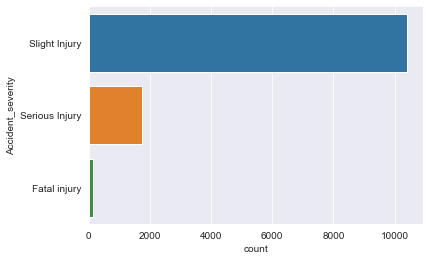

In [11]:
sns.countplot(data= df, y='Accident_severity')

In [12]:
df = df.fillna(method='ffill')
df = df.fillna(method='bfill')

In [13]:
df.isnull().sum()[df.isna().sum() != 0]

Series([], dtype: int64)

<AxesSubplot:xlabel='count', ylabel='Day_of_week'>

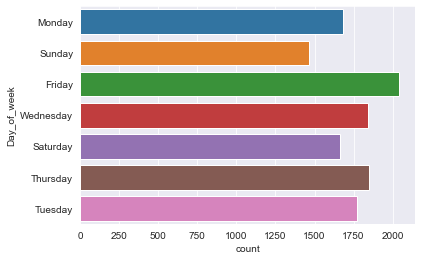

In [14]:
sns.countplot(data=df, y='Day_of_week')

In [15]:
def weekday_or_weekend(x):
    if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
        x = 'Weekday'
    else:
        x = 'Weekend'
    
    return x

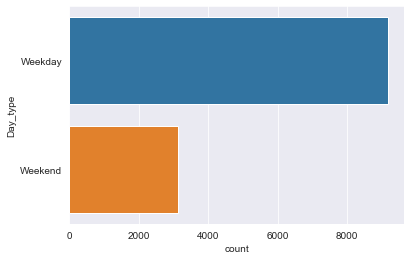

In [16]:
df['Day_type'] = df['Day_of_week'].apply(lambda x: weekday_or_weekend(x))
sns.countplot(data=df, y='Day_type')
df.drop(['Day_of_week'], inplace=True, axis=1)

In [17]:
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = df['Time'].dt.hour
df['Minutes'] = df['Time'].dt.minute
df.drop('Time', inplace=True, axis=1)

In [18]:
df.head()

,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Day_type,Hour,Minutes
0,18-30,Male,Above high school,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,Undivided Two way,...,na,na,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury,Weekday,17,2
1,31-50,Male,Junior high school,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,...,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury,Weekday,17,2
2,18-30,Male,Junior high school,1-2yr,Lorry (41?100Q),Owner,5-10yrs,No defect,Recreational areas,other,...,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury,Weekday,17,2
3,18-30,Male,Junior high school,5-10yr,Public (> 45 seats),Governmental,5-10yrs,No defect,Office areas,other,...,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,Weekend,1,6
4,18-30,Male,Junior high school,2-5yr,Public (> 45 seats),Owner,5-10yrs,No defect,Industrial areas,other,...,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury,Weekend,1,6


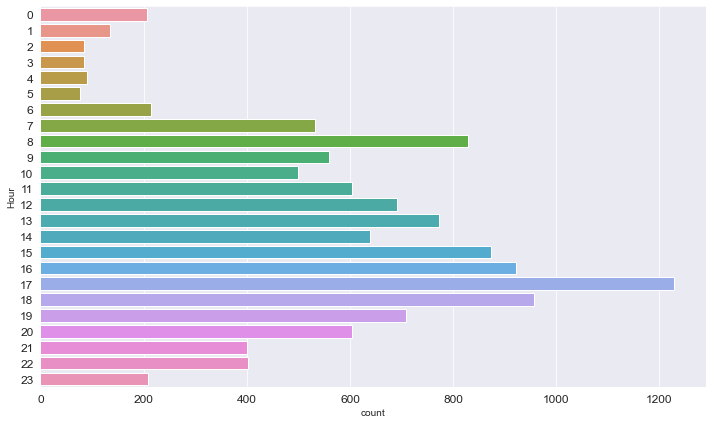

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Hour')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

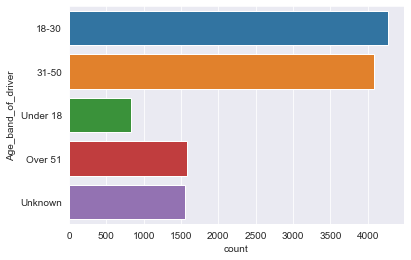

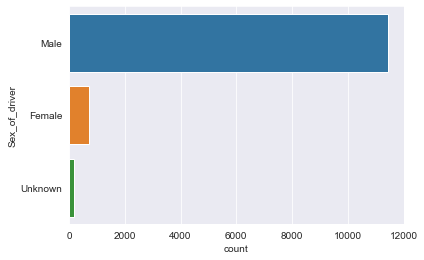

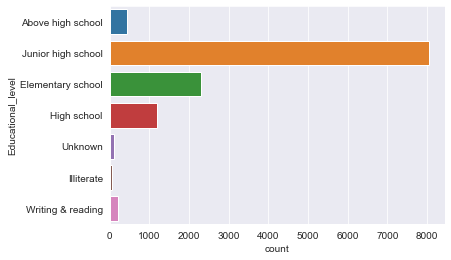

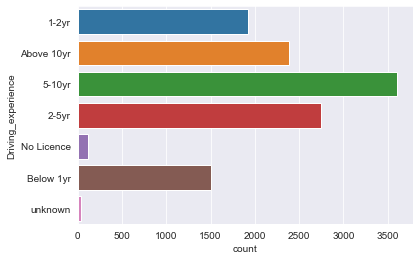

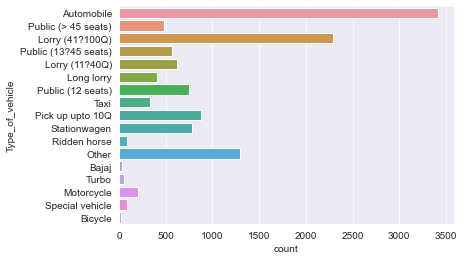

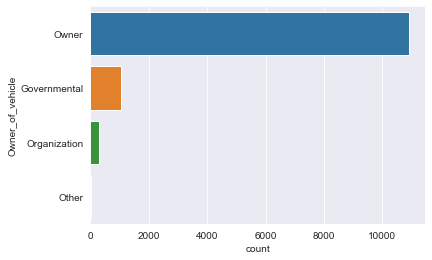

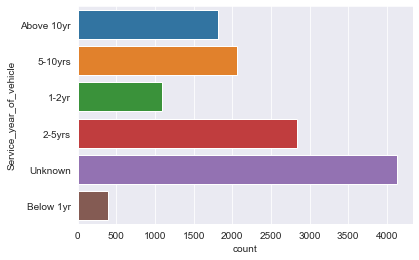

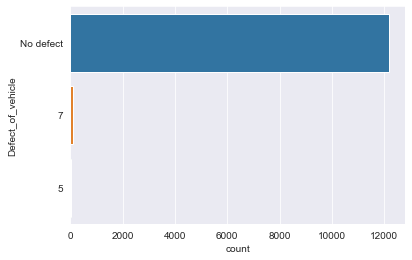

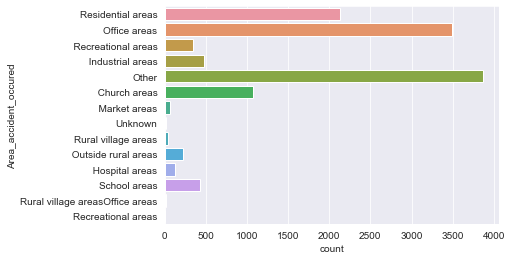

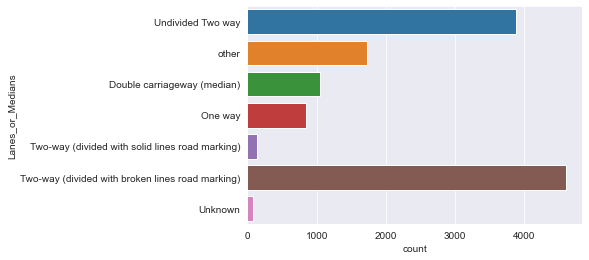

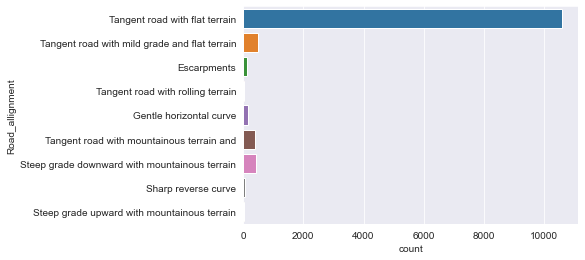

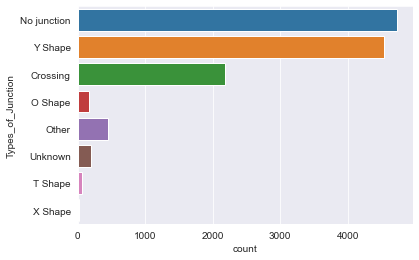

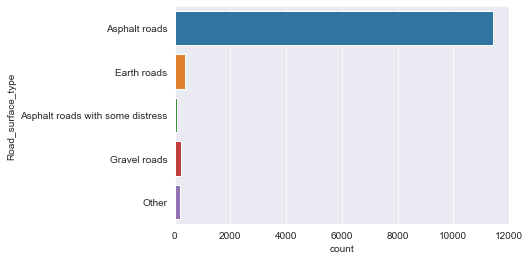

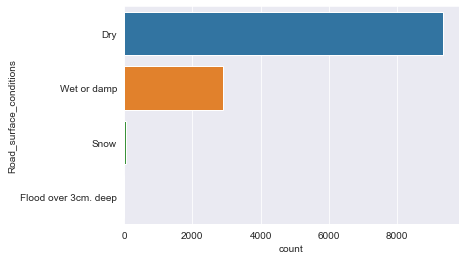

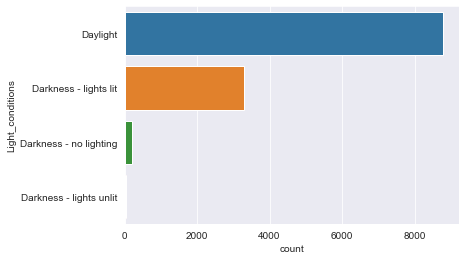

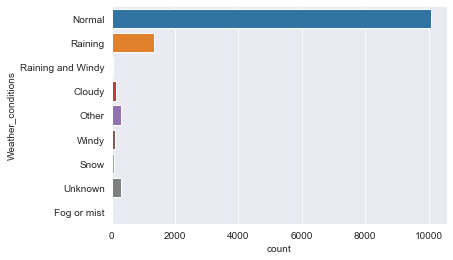

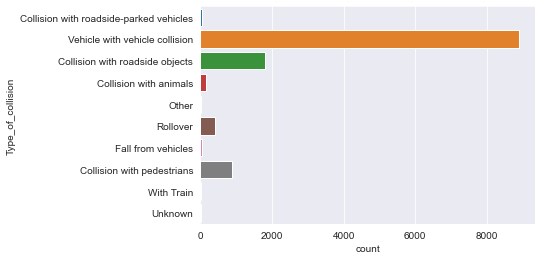

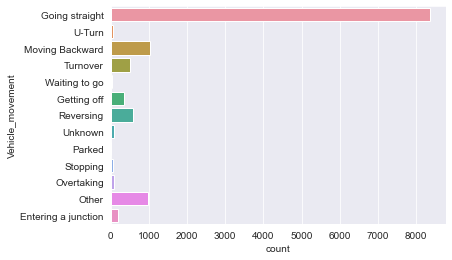

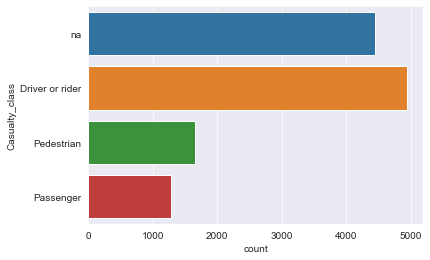

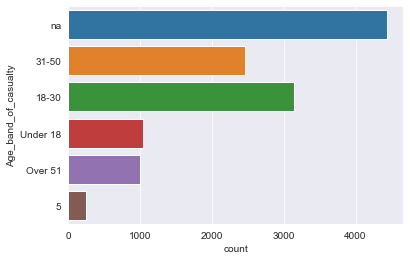

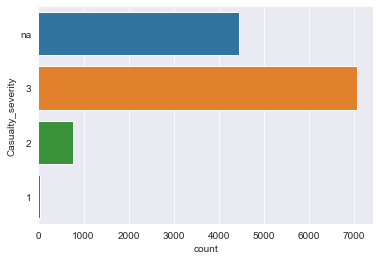

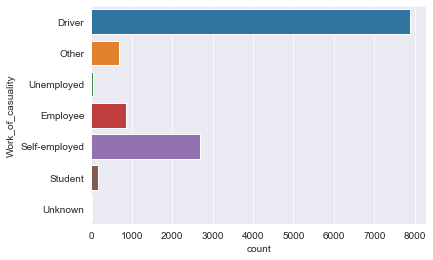

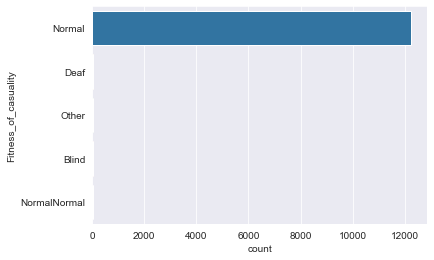

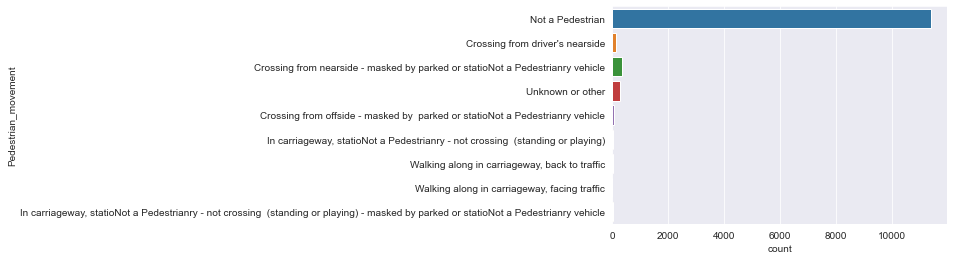

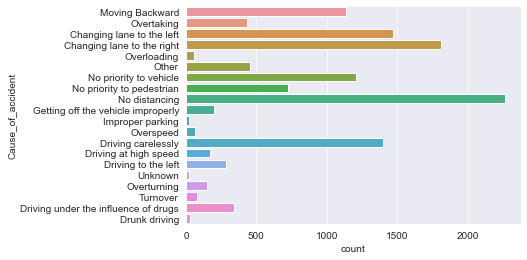

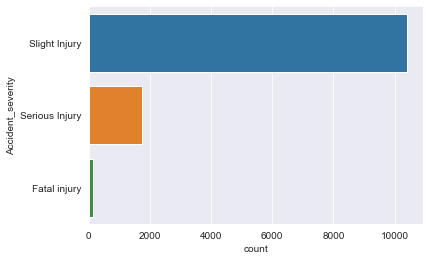

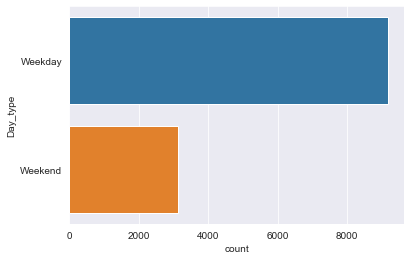

In [20]:
for col in df.select_dtypes(include='object'):
    if df[col].nunique() <= 30:
        sns.countplot(data=df, y=col)
        plt.show()

In [21]:
def ordinal_encoding(df, feats):
    for feat in feats:
        feat_val = list(1+np.arange(df[feat].nunique()))
        feat_key = list(df[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        df[feat] = df[feat].map(feat_dict)

    return df

In [22]:
df = ordinal_encoding(df, df.drop(['Accident_severity'], axis=1).columns)

In [23]:
df.head()

,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Day_type,Hour,Minutes
0,1,2,1,1,1,4,4,3,10,5,...,6,4,1,3,6,10,Slight Injury,1,18,3
1,2,2,5,4,12,4,3,3,7,5,...,6,4,1,3,6,17,Slight Injury,1,18,3
2,1,2,5,1,6,4,3,3,2,7,...,2,3,1,3,6,1,Serious Injury,1,18,3
3,1,2,5,3,12,1,3,3,7,7,...,1,3,1,3,6,2,Slight Injury,2,2,7
4,1,2,5,2,12,4,3,3,5,7,...,6,4,1,3,6,17,Slight Injury,2,2,7


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df.drop('Accident_severity', axis=1)
y = df['Accident_severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8621, 30) (8621,) (3695, 30) (3695,)


In [27]:
counter = Counter(y_train).items()
print(counter)

dict_items([('Slight Injury', 7324), ('Serious Injury', 1191), ('Fatal injury', 106)])


In [28]:
for i, j in counter:
    perc = j/len(y_train)
    print(f'{i} : {perc*100:.2f}%')

Slight Injury : 84.96%
Serious Injury : 13.82%
Fatal injury : 1.23%


In [29]:
smote = SMOTE()

In [30]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [31]:
counter = Counter(y_train).items()
for i, j in counter:
    perc = j/len(y_train)
    print(f'{i} : {perc*100:.2f}%')

Slight Injury : 33.33%
Serious Injury : 33.33%
Fatal injury : 33.33%


In [32]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(21972, 30) (21972,) (3695, 30) (3695,)


In [33]:
y_train.head()

0     Slight Injury
1    Serious Injury
2    Serious Injury
3     Slight Injury
4    Serious Injury
Name: Accident_severity, dtype: object

In [34]:
xgb = XGBClassifier()

In [35]:
xgb.fit(X_train, y_train)

[17:59:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/thilakcm/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
predictions = xgb.predict(X_test)

In [37]:
print(confusion_matrix(y_test, predictions))

[[   9    3   40]
 [   3  107  442]
 [  16  224 2851]]


In [38]:
print(classification_report(y_test, predictions))

                precision    recall  f1-score   support

  Fatal injury       0.32      0.17      0.23        52
Serious Injury       0.32      0.19      0.24       552
 Slight Injury       0.86      0.92      0.89      3091

      accuracy                           0.80      3695
     macro avg       0.50      0.43      0.45      3695
  weighted avg       0.77      0.80      0.78      3695

